In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

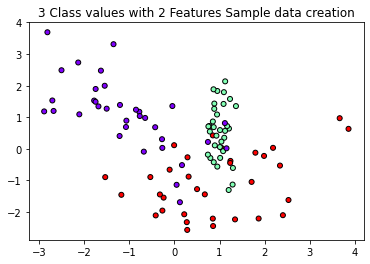

In [6]:
plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2,n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [7]:
import numpy as np

In [12]:
# Classifier의 Decision Boundry를 시각화 하는 함수
def visualize_boundry(model, X, y):
    fig = plt.subplot()
    ax = plt.subplot()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:,1], c=y, s=25, cmap='rainbow', edgecolor='k',clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end,num=200))
    Z= model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1)-0.5, cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

In [10]:
from sklearn.tree import DecisionTreeClassifier

<ipython-input-12-dfd323c6b410>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()
<ipython-input-12-dfd323c6b410>:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1)-0.5, cmap='rainbow', clim=(y.min(), y.max()), zorder=1)


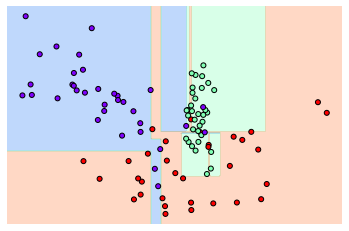

In [13]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundry(dt_clf, X_features, y_labels)